<a href="https://colab.research.google.com/github/ShineySun/BASIC_AI/blob/master/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ㅁ Practice DBSCAN Method 

* DBSCAN Tutorial for line segment clustering
* Data : IRIS Sample Data
* Language : Python3
* Date : 2020.08.25


In [11]:
from sklearn import datasets
import pandas as pd

#### Read IRIS Sample Data

In [12]:
iris_data = datasets.load_iris()

labels = pd.DataFrame(iris_data.target)
labels.columns = ['labels']

data = pd.DataFrame(iris_data.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data,labels], axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Check data.shape

In [13]:
print(data.shape)
print("| ----------------------------- Data ---------------------------- |")
print(data)

(150, 5)
| ----------------------------- Data ---------------------------- |
     Sepal length  Sepal width  Petal length  Petal width  labels
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


### Extract Feature

In [14]:
feature = data[['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
print(feature.shape)
print("---------------------------- Data ----------------------------")
print(feature)

(150, 4)
---------------------------- Data ----------------------------
     Sepal length  Sepal width  Petal length  Petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


### Create model, training & Prediction

In [16]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(eps=0.3, min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

r = pd.concat([feature, predict], axis=1)

print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3       -1
146           6.3          2.5           5.0          1.9       -1
147           6.5          3.0           5.2          2.0       -1
148           6.2          3.4           5.4          2.3       -1
149           5.9          3.0           5.1          1.8       -1

[150 rows x 5 columns]


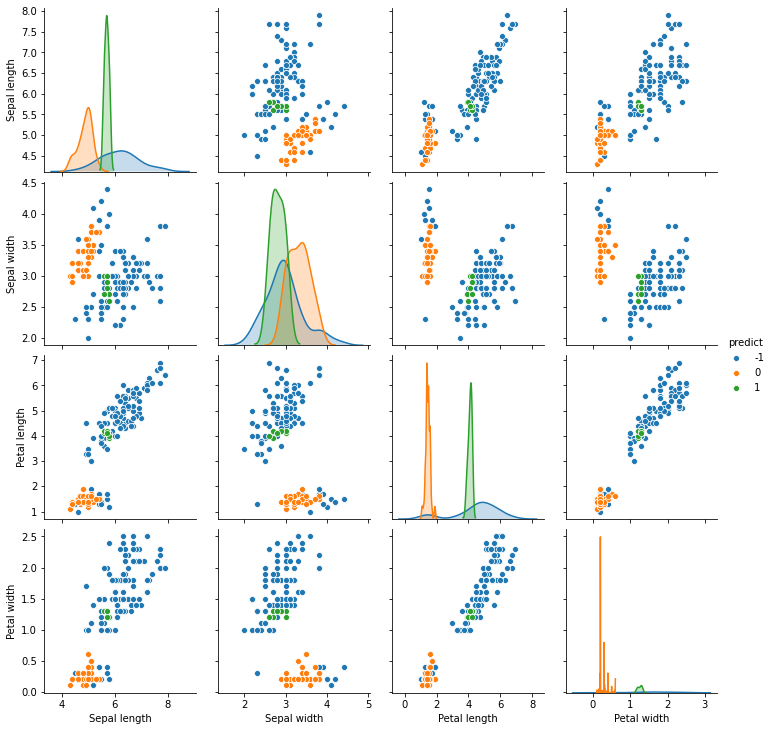

In [17]:
# pairplot with Seaborn
sns.pairplot(r, hue='predict')
plt.show()

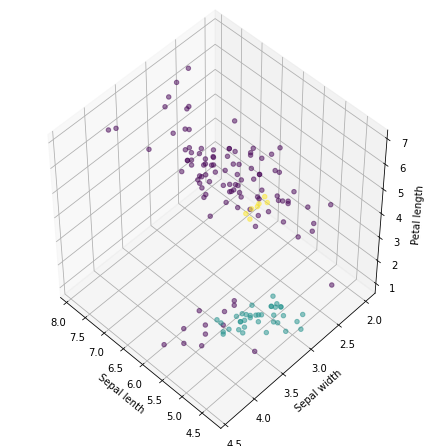

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

### Evaluate model with cross tabuliazation

In [19]:
ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1
labels             
0        13  37   0
1        43   0   7
2        50   0   0


### Standarize Value

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
model = model = DBSCAN(min_samples=6)
pipeline = make_pipeline(scaler,model)
predict = pd.DataFrame(pipeline.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict  -1   0   1   2   3
labels                     
0         7  43   0   0   0
1        13   0  31   6   0
2        22   0  10   0  18
